In [1]:
"""" 
aggregate GFS data (which is used to force RTOFS) under smb://mule/disk3/projects/tc2022/
named like:
    /mule/tc2022/GFS/sfc/[YYYYMMDD]/reg
    /mule/tc2022/tc2023/GFS/sfc/[YYYYMMDD]/reg/
    /mule/tc2022/tc2024/GFS/sfc/[YYYYMMDD]/reg/
with names like gfs.20230916.t00z.sfcf001.nc, where, in this case, 
t00z signifies the 0z forcast cycle and sfcf001 means that this data from forecast hour 1. 

to produce hourly momentum flux and surface ocean current data that offers
a chance to evaluate wind work on currents at the GFS and RTOFS horizontal scales 
(~ 12km for GFS/ 0.117 deg)(~8 km for RTFS/ 0.08 deg)
This version tries to convert time from each file's time attributes.
"""
import numpy as np
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os
import sys

In [2]:
path = '/Volumes/disk3/projects/tc2022/tc2023/GFS/sfc/'
year = '2023'
hr_fcst = np.arange(1,7) # hour 1 to 6
print(hr_fcst)
datelim = [datetime.datetime(int(year),9,1), datetime.datetime(int(year),9,30)]
nfiles = (datelim[1]-datelim[0]).days+1
print(nfiles,'days')
file_dates = [(datelim[0]+datetime.timedelta(hours=6*i)) for i in range(nfiles*4)]
print(file_dates)

[1 2 3 4 5 6]
30 days
[datetime.datetime(2023, 9, 1, 0, 0), datetime.datetime(2023, 9, 1, 6, 0), datetime.datetime(2023, 9, 1, 12, 0), datetime.datetime(2023, 9, 1, 18, 0), datetime.datetime(2023, 9, 2, 0, 0), datetime.datetime(2023, 9, 2, 6, 0), datetime.datetime(2023, 9, 2, 12, 0), datetime.datetime(2023, 9, 2, 18, 0), datetime.datetime(2023, 9, 3, 0, 0), datetime.datetime(2023, 9, 3, 6, 0), datetime.datetime(2023, 9, 3, 12, 0), datetime.datetime(2023, 9, 3, 18, 0), datetime.datetime(2023, 9, 4, 0, 0), datetime.datetime(2023, 9, 4, 6, 0), datetime.datetime(2023, 9, 4, 12, 0), datetime.datetime(2023, 9, 4, 18, 0), datetime.datetime(2023, 9, 5, 0, 0), datetime.datetime(2023, 9, 5, 6, 0), datetime.datetime(2023, 9, 5, 12, 0), datetime.datetime(2023, 9, 5, 18, 0), datetime.datetime(2023, 9, 6, 0, 0), datetime.datetime(2023, 9, 6, 6, 0), datetime.datetime(2023, 9, 6, 12, 0), datetime.datetime(2023, 9, 6, 18, 0), datetime.datetime(2023, 9, 7, 0, 0), datetime.datetime(2023, 9, 7, 6, 0), dat

In [3]:
''' Read one file a time to aggregate selected variables of interest'''
str_vars = ['TIME','LON','LAT','UFLX_AVE','VFLX_AVE']
vars_nostack = ['LON','LAT']
''' Cread Dictionary'''
vars_dic = {}
vars_dic_attr = {}
attr = ['long_name','units']#,'_FillValue']
ds = nc.Dataset( path+'20230907/reg/gfs.20230907.t00z.sfcf001.nc')
varnms = list( ds.variables.keys() )
print(varnms)
''' add empty items to the dictionary '''
for i in range( len(varnms) ):
    vkey = varnms[i]
    if vkey in str_vars:
        print(vkey)
        item = ds.variables[vkey][:]
        vars_dic[vkey] = np.empty( item.shape )
        attrnms = ds.variables[vkey].ncattrs()
        # print(attrnms)
        ### record attributes
        for a in range( len(attr) ):
            # ds.variables[vkey].units
            if attr[a] in attrnms:
                print(attr[a])
                str_eval = "ds.variables['" + vkey + "']." + attr[a]
                vars_dic_attr[vkey+'-'+attr[a]] = eval(str_eval)
                print(str_eval)
        # print(vkey, item.shape, vars_dic[vkey].shape)
print(len(varnms),'variables in nc file &', len(vars_dic),'variables are selected to append')

['GRID_XT2203_2817', 'GRID_YT833_1161', 'GRID_YT833_1161_bnds', 'LAT', 'LON', 'TIME', 'DLWRF', 'DLWRF_AVE', 'DSWRF', 'DSWRF_AVE', 'FRICV', 'HPBL', 'LHTFL', 'LHTFL_AVE', 'PRESSFC', 'SFCR', 'SHTFL', 'SHTFL_AVE', 'SPFH2M', 'SPFH_HYBLEV1', 'SPFHMAX_MAX2M', 'SPFHMIN_MIN2M', 'TMAX_MAX2M', 'TMIN_MIN2M', 'TMP2M', 'TMP_HYBLEV1', 'TMPSFC', 'TPRCP', 'UFLX_AVE', 'UGRD10M', 'UGRD_HYBLEV1', 'ULWRF', 'ULWRF_AVE', 'USWRF', 'USWRF_AVE', 'VFLX_AVE', 'VGRD10M', 'VGRD_HYBLEV1']
LAT
long_name
ds.variables['LAT'].long_name
units
ds.variables['LAT'].units
LON
long_name
ds.variables['LON'].long_name
units
ds.variables['LON'].units
TIME
long_name
ds.variables['TIME'].long_name
units
ds.variables['TIME'].units
UFLX_AVE
long_name
ds.variables['UFLX_AVE'].long_name
units
ds.variables['UFLX_AVE'].units
VFLX_AVE
long_name
ds.variables['VFLX_AVE'].long_name
units
ds.variables['VFLX_AVE'].units
38 variables in nc file & 5 variables are selected to append


In [ ]:
ds.close()
ds = nc.Dataset( path+'20230901/reg/gfs.20230901.t06z.sfcf002.nc')
str_bef_time = 'since '
for name, variable in ds.variables.items():            
    if name == 'TIME':
        ''' method 1 '''
        print(name,':')
        test = getattr(variable, 'units')
        print(test)
        i = test.index(str_bef_time)
        str_dtime_base = test[i+len(str_bef_time):]
        print(datetime.datetime.strptime(str_dtime_base,'%Y-%m-%d %H:%M:%S'))
        ''' method 2 '''
        variable1 = ds.variables[name]
        test = getattr(variable1,'units')
        print(test)

TIME :
hours since 2023-09-01 06:00:00
2023-09-01 06:00:00
hours since 2023-09-01 06:00:00


In [61]:
### Go through the folders listed above and use the forecast hour 1-6 for each forecast cycle
time1 = []
time2 = []
time3 = []
cnt = 0
dtime_base = datetime.datetime(int(year),1,1)
for f, dtime_f in enumerate(file_dates):
    folder_date = dtime_f.strftime('%Y%m%d')
    fcst_hr = dtime_f.hour
    # print(dtime_f, folder_date, str(fcst_hr).zfill(2), )
    for hr in hr_fcst:
        path_fn = path+folder_date+'/reg/gfs.'+folder_date+\
            '.t'+str(fcst_hr).zfill(2)+'z.sfcf'+str(hr).zfill(3)+'.nc'
        if os.path.isfile(path_fn):
            print('='*10)
            print('Read file:',path_fn)
            ds = nc.Dataset(path_fn)

            for i in range( len(varnms) ):
                vkey = varnms[i]
                if (vkey in str_vars) & (vkey not in vars_nostack):
                    # print(vkey)
                    vkey = varnms[i]
                    item_old = vars_dic[vkey]
                    if vkey == 'TIME':
                        ''' method 1: look at attribute of time '''
                        time_units = getattr(ds.variables['TIME'],'units')
                        print('units=',time_units)
                        i = time_units.index(str_bef_time)
                        str_dtime_base = time_units[i+len(str_bef_time):]
                        dtime_base = datetime.datetime.strptime(str_dtime_base,'%Y-%m-%d %H:%M:%S')
                        time_since_base = float(ds.variables['TIME'][:])
                        print(time_since_base)
                        time1.append( (dtime_base+datetime.timedelta(hours=time_since_base)).timestamp() )
                        ''' method 2: aggregate_GFS_sfc.ipynb '''
                        time2.append( (datetime.datetime.strptime(folder_date,'%Y%m%d')+\
                                datetime.timedelta(hours=int(fcst_hr+hr))-datetime.datetime(int(year),1,1)).total_seconds() )
                        ''' method 3: aggregate_GFS_sfc_NA.ipynb '''
                        time3.append( (datetime.datetime.strptime(folder_date,'%Y%m%d')+\
                                datetime.timedelta(hours=int(fcst_hr+hr))).timestamp() )
                            
                    # else:
                    #     item_app = ds.variables[vkey][:]
                    ### append in time dimension only
                    # if cnt == 0:
                    #     vars_dic[vkey] = item_app
                    # else:
                    #     vars_dic[vkey] = np.concatenate( (item_old, item_app),axis=0 )
                    # if cnt == 0: ### for variables that do not need to append in time
                    #     for var_nostack in vars_nostack:
                    #         vars_dic[var_nostack] = ds.variables[var_nostack][:]
            ds.close()
            print('Done',path_fn)
            cnt = cnt + 1
    if f > 20:
        break

Read file: /Volumes/disk3/projects/tc2022/tc2023/GFS/sfc/20230901/reg/gfs.20230901.t00z.sfcf001.nc
units= hours since 2023-09-01 00:00:00
1.0
Done /Volumes/disk3/projects/tc2022/tc2023/GFS/sfc/20230901/reg/gfs.20230901.t00z.sfcf001.nc
Read file: /Volumes/disk3/projects/tc2022/tc2023/GFS/sfc/20230901/reg/gfs.20230901.t00z.sfcf002.nc
units= hours since 2023-09-01 00:00:00
2.0
Done /Volumes/disk3/projects/tc2022/tc2023/GFS/sfc/20230901/reg/gfs.20230901.t00z.sfcf002.nc
Read file: /Volumes/disk3/projects/tc2022/tc2023/GFS/sfc/20230901/reg/gfs.20230901.t00z.sfcf003.nc
units= hours since 2023-09-01 00:00:00
3.0
Done /Volumes/disk3/projects/tc2022/tc2023/GFS/sfc/20230901/reg/gfs.20230901.t00z.sfcf003.nc
Read file: /Volumes/disk3/projects/tc2022/tc2023/GFS/sfc/20230901/reg/gfs.20230901.t00z.sfcf004.nc
units= hours since 2023-09-01 00:00:00
4.0
Done /Volumes/disk3/projects/tc2022/tc2023/GFS/sfc/20230901/reg/gfs.20230901.t00z.sfcf004.nc
Read file: /Volumes/disk3/projects/tc2022/tc2023/GFS/sfc/202

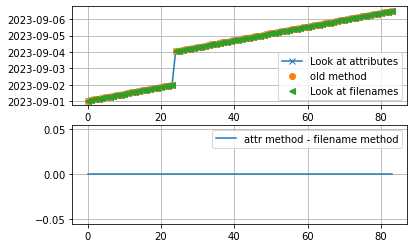

In [ ]:
''' check if time agrees between the three methods --> They agree with one another. '''
plt.clf()
plt.subplot(2,1,1)
plt.plot([datetime.datetime.fromtimestamp(item) for item in time1],'-x',label='Look at attributes')
plt.plot([datetime.datetime(int(year),1,1)+datetime.timedelta(seconds=item) for item in time2],'o',label='old method')
plt.plot([datetime.datetime.fromtimestamp(item) for item in time3],'<',label='Look at filenames')
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.plot(np.array(time1)-np.array(time3),label='attr method - filename method')
# plt.plot(np.array(time2)-np.array(time3),label='old method - filename method')
# plt.plot(np.array(time1)-np.array(time2),label='attr method - old method')
plt.legend()
plt.grid()
